# linear split

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file=pd.read_csv('ex2data1.txt',names=['exam1','exam2','accept'])
file.head()

,exam1,exam2,accept
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


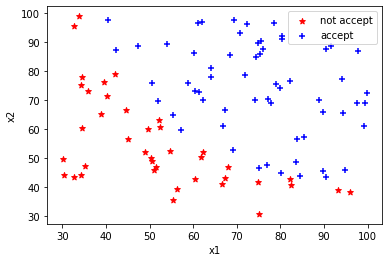

In [3]:
fig1=plt.plot(figsize=(10,10))
x10=file[file['accept']==0]['exam1']
x20=file[file['accept']==0]['exam2']
plt.scatter(x10,x20,c='r',label='not accept',marker='*')
x11=file[file['accept']==1]['exam1']
x21=file[file['accept']==1]['exam2']
plt.scatter(x11,x21,c='b',label='accept',marker='+')
plt.legend()
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [4]:
def sigmoid(z):
    x=1/(1+np.exp(-z))
    return x
    

In [5]:
def costFun(x,y,theta):
    h=sigmoid(x@theta)
    inner=y*np.log(h)+(1-y)*np.log(1-h)
    cost=-np.sum(inner)/len(y)
    return cost

In [6]:
file.insert(0,'x0',1)

In [7]:
X=file.iloc[:,0:-1]
y=file.iloc[:,-1]
X=X.values
y=y.values
y=y.reshape((100,1))

In [8]:
theta=np.zeros((3,1))
cost_init=costFun(X,y,theta)

In [9]:
def gradi(x,y,theta,alpha,iters):
    costs=[]
    for i in range(iters):
        theta=theta-alpha*X.T@(sigmoid(X@theta)-y)/len(y)
        cost=costFun(x,y,theta)
        costs.append(cost)
        if i%10000==0:
            print('i:',i,'loss:',cost)
    return theta,costs

In [10]:
theta,costs=gradi(X,y,theta,0.0002,20000)

i: 0 loss: 0.6511194445087186
i: 10000 loss: 0.6202331371498342


In [11]:
print(theta)

[[-0.27447884]
 [ 0.01233337]
 [ 0.00258652]]


In [12]:
theta.shape

(3, 1)

In [13]:
coef1=-theta[0,0]/theta[2,0]
coef2=-theta[1,0]/theta[2,0]
x1=np.linspace(20,100,100)
f=coef1+coef2*x1

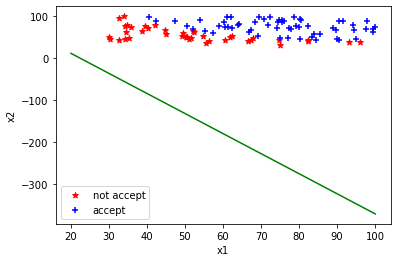

In [14]:
fig2=plt.plot(figsize=(10,10))
x10=file[file['accept']==0]['exam1']
x20=file[file['accept']==0]['exam2']
plt.scatter(x10,x20,c='r',label='not accept',marker='*')
x11=file[file['accept']==1]['exam1']
x21=file[file['accept']==1]['exam2']
plt.scatter(x11,x21,c='b',label='accept',marker='+')
plt.plot(x1,f,c='g')
plt.legend()
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [15]:
def acc(x,theta):
    prob=sigmoid(x@theta)
    result=[]
    for x in prob:
        if x>=0.5:
            y=1
        else:
            y=0
        result.append(y)
    return result

In [16]:
y_pred=acc(X,theta)
y_pred=np.array(y_pred)
y_pred=y_pred.reshape(len(y_pred),1)

In [17]:
accurancy=np.mean(y_pred==y)

In [18]:
print(accurancy)

0.6


# non-linear split

in order to get the best boundary, have to change lambda,iterations,alpha

be sure the dimension of regulizer in gradi & costfun

feature map,best chioce=6

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('ex2data2.txt',names=['test1','test2','accept'])
data.head()

,test1,test2,accept
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [3]:
xn10=data[data['accept']==0]['test1']
xn20=data[data['accept']==0]['test2']
xn11=data[data['accept']==1]['test1']
xn21=data[data['accept']==1]['test2']

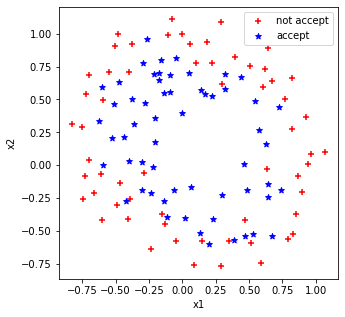

In [4]:
fig3=plt.figure(figsize=(5,5))
plt.scatter(xn10,xn20,c='r',marker='+',label='not accept')
plt.scatter(xn11,xn21,c='b',marker='*',label='accept')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

In [5]:
#feature map
def feature_map(x1,x2,power):
    data=dict()
    for i in range(power+1):
        for j in range(i+1):
            data['F{}{}'.format(i-j,j)]=np.power(x1,i-j)*np.power(x2,j)
            file=pd.DataFrame(data)
    return file
    

In [6]:
file =feature_map(data['test1'],data['test2'],6)

In [7]:
def sigmoid(z):
    g=1/(1+np.exp(-z))
    return g

In [8]:
def costFun(x,y,theta,lam):
    h=sigmoid(x@theta)
    inner=y*np.log(h)+(1-y)*np.log(1-h)
    reg=np.sum(np.power(theta[1:],2))*lam/(2*len(y))
    cost=-np.sum(inner)/len(y)+reg
    return cost

In [9]:
#X=file.iloc[:,0:-1]
y=data.iloc[:,-1]

In [10]:
X=file.values
y=y.values
y=y.reshape((118,1))

In [11]:
X.shape

(118, 28)

In [12]:
theta=np.zeros((28,1))
cost_init=costFun(X,y,theta,1)

In [13]:
def gradi(x,y,theta,alpha,iters,lam):
    costs=[]
    for i in range(iters):
        reg=theta[1:]*(lam/(len(y)))
        reg=np.insert(reg,0,values=0,axis=0)
        #theta = theta - (X.T@(sigmoid(X@theta) - y)) * alpha / len(X) -reg
        theta=theta-alpha*x.T@(sigmoid(x@theta)-y)/len(y)-reg
        cost=costFun(x,y,theta,lam)
        costs.append(cost)
        if i%50000==0:
            print('i:',i,'loss:',cost)
    return theta,costs

In [14]:
theta,costs=gradi(X,y,theta,0.001,200000,0.1)

i: 0 loss: 0.6931343808043247
i: 50000 loss: 0.6803869193707022
i: 100000 loss: 0.6803869118119377
i: 150000 loss: 0.6803869118118436


In [15]:
def pred(x,theta):
    prob=sigmoid(x@theta)
    ms=[]
    for i in prob:
        if i>=0.5:
            m=1
        else:
            m=0
        ms.append(m)
    return ms

In [16]:
y_pred=pred(X,theta)
print(y_pred)

[0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0]


In [17]:
sigmoid(X@theta)

array([[0.49429017],
       [0.49616197],
       [0.49616352],
       [0.50230186],
       [0.50182346],
       [0.50389743],
       [0.50513327],
       [0.5048094 ],
       [0.50339663],
       [0.50165899],
       [0.49784659],
       [0.49479857],
       [0.49263615],
       [0.48726179],
       [0.49148269],
       [0.49532584],
       [0.49940123],
       [0.48696266],
       [0.49571094],
       [0.4976772 ],
       [0.49722062],
       [0.50164512],
       [0.50284306],
       [0.50358486],
       [0.50373657],
       [0.49989747],
       [0.49643576],
       [0.48860614],
       [0.50154315],
       [0.4907003 ],
       [0.47078308],
       [0.48886098],
       [0.49814846],
       [0.50320827],
       [0.50481854],
       [0.50563564],
       [0.50491902],
       [0.50509124],
       [0.50469918],
       [0.50181387],
       [0.5022159 ],
       [0.49854099],
       [0.49263456],
       [0.49939998],
       [0.49281048],
       [0.49420595],
       [0.48277224],
       [0.498

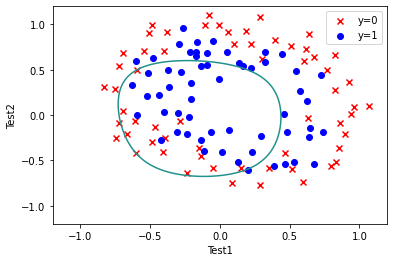

In [18]:
x = np.linspace(-1.2,1.2,200)
xx,yy = np.meshgrid(x,x)
z = feature_map(xx.ravel(),yy.ravel(),6).values

zz = z @ theta
zz = zz.reshape(xx.shape)

fig,ax = plt.subplots()
ax.scatter(data[data['accept']==0]['test1'],data[data['accept']==0]['test2'],c='r',marker='x',label='y=0')
ax.scatter(data[data['accept']==1]['test1'],data[data['accept']==1]['test2'],c='b',marker='o',label='y=1')
ax.legend()
ax.set(xlabel='Test1',
          ylabel='Test2')

plt.contour(xx,yy,zz,0)
plt.show()
